# The adverse health effects of air pollution. Are we making any progress?

<img src=files/air.jpg width="900">

**Credit:**  [Flickr/E4C](https://www.flickr.com/people/44221799@N08/) 

In [1]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

## Introduction

**Business Context.** Air pollution is a very serious issue that the global population is dealing with in present time. The abundance of air pollutants in the air is not only contributing to global warming, but it is also causing problematic health issues to the population. There has been numerous efforts to protect and improve the air quality across the nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as *coal*. Big industries and several other economic/political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate our general population and create awareness of this issue, we will be able to overcome this problem in the future.      

For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of plausible impacts of air contamination to the health of the global population. They have gathered some *raw* data provided by the [World Health Organization](https://www.who.int/), the [The Institute for Health Metrics and Evaluation](http://www.healthdata.org/) and the [World Bank Group](https://www.worldbank.org/). Your task is to conduct a data analysis, search for potential information and create visualizations that the client can use for their campaigns and grant applications. 

**Analytical Context.** You are give a folder, named ```files``` with *raw* data. This data contains a quite large number of variables and it is in a quite messy-like state. In addition, one of the datasets contains very poor/hidden documentation segmented in several datasets. Your objective will be to:

1. Extract and clean relevant data. You will have to manipulate several datasets to obtain useful information to the case. 
2. Conduct an Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypothesis and study the relationship between various indicators related to air pollution.

Additionally, the client has some broad questions they would like to answer:
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
2. Which are the critical regions where we must start environmental campaigns?
3. Are we making any progress in the prevention of deaths related to air pollution?
4. Which demographic characteristics seem to correlate with the number of health related issues derived from air pollution? 




## Extracting and cleaning relevant data

Let's take a look at the data provided by the client in the ```files``` folder. There, we see another folder  named ```WDI_csv``` with several CSV files corresponding to the World Bank's primary [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators). The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. 

Let's take a peek at the file ```WDIData.csv```:

In [2]:
WDI_data=pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
Country Name      377256 non-null object
Country Code      377256 non-null object
Indicator Name    377256 non-null object
Indicator Code    377256 non-null object
1960              37395 non-null float64
1961              41211 non-null float64
1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say ```Arab World```, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with ```NaN``` values for each year column.

Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file ```WDISeries.csv``` which seems to contain more information about the indicators:

In [3]:
WDI_ids=pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


Bingo! The ```WDI_ids``` DataFrame contains a column named ```Topic```. Moreover, it seems that *Environment* is listed as a key topic in the column.

### Exercise 1: (15 min)

Extract all the rows that have the topic key *Environment* in ```WDI_ids```. Add to the resulting DataFrame a new column named ```Subtopic``` which contains the corresponding subtopic of the indicator. For example, the subtopic of ```Environment: Agricultural production``` is ```Agricultural production```. Which subtopics do you think are of interest to us?

**Hint:** Remember that you can apply string methods to Series using the ```str()``` method of ```pandas```. 

**Answer.**

_I will start by filtering the Topics that starts with "Environ" and split._

In [4]:
WDI_ids['Subtopic']=WDI_ids['Topic'].str.split(": ",expand=True)[1]

In [5]:
env_topics =np.sort(WDI_ids.loc[WDI_ids['Topic'].str.startswith('Environment'),'Subtopic'].unique())

In [6]:
env_topics

array(['Agricultural production', 'Biodiversity & protected areas',
       'Density & urbanization', 'Emissions', 'Energy production & use',
       'Freshwater', 'Land use', 'Natural resources contribution to GDP'],
      dtype=object)

_Seems correct. The Environment Subotopics are:_

_Note that, from besides *creating and promoting awareness on fossil fuel using effects*, some other given questions are explicitly given:_


_1. Are we making any progress in reducing the amount of emitted pollutants across the globe?_

_2. Which are the critical regions where we must start environmental campaigns?_

_3. Are we making any progress in the prevention of deaths related to air pollution?_

_4. Which demographic characteristics seem to correlate with the number of health related issues derived from air pollution?_ 

_So, I think that the following subtopics could be relevant on its own merit:_

_-Agricultural production: Could fossil fuel use impact this? A rainy weather could terminate some crops._

_-Biodiversity & protected areas: Could fossil fuel use impact this? Ecosystems could be impacted_

_-Density & urbanization:Could fossil fuel use impact this (or viceversa)?_

_-Emissions: Could give us a notion of which countries displays a higher use intensity for each pollutant agent_

_-Energy production & use: This is also important_

_-Freshwater: Is water availability impacted by fossil fuels?_ 

_-Land use: Is Land availability impacted by fossil fuels?_

_-Natural resources contribution to GDP: Could Countries more dependant on Natural resources should be more impacted?_ 

_I would keep all the subtopics, unless they reveal irrelevant on a later phase or according to exercise context._



### Exercise 2: (15 min)

Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame ```Emissions_df```. How many emissions indicators are in the study?

**Answer.**

_I would filter my Data Frame, including just the rows with the "Emissions" subtopic_

In [7]:
emission_codes=np.sort(WDI_ids.loc[WDI_ids['Subtopic']=='Emissions','Series Code'].unique())
print(emission_codes)

['EN.ATM.CO2E.EG.ZS' 'EN.ATM.CO2E.GF.KT' 'EN.ATM.CO2E.GF.ZS'
 'EN.ATM.CO2E.KD.GD' 'EN.ATM.CO2E.KT' 'EN.ATM.CO2E.LF.KT'
 'EN.ATM.CO2E.LF.ZS' 'EN.ATM.CO2E.PC' 'EN.ATM.CO2E.PP.GD'
 'EN.ATM.CO2E.PP.GD.KD' 'EN.ATM.CO2E.SF.KT' 'EN.ATM.CO2E.SF.ZS'
 'EN.ATM.GHGO.KT.CE' 'EN.ATM.GHGO.ZG' 'EN.ATM.GHGT.KT.CE' 'EN.ATM.GHGT.ZG'
 'EN.ATM.HFCG.KT.CE' 'EN.ATM.METH.AG.KT.CE' 'EN.ATM.METH.AG.ZS'
 'EN.ATM.METH.EG.KT.CE' 'EN.ATM.METH.EG.ZS' 'EN.ATM.METH.KT.CE'
 'EN.ATM.METH.ZG' 'EN.ATM.NOXE.AG.KT.CE' 'EN.ATM.NOXE.AG.ZS'
 'EN.ATM.NOXE.EG.KT.CE' 'EN.ATM.NOXE.EG.ZS' 'EN.ATM.NOXE.KT.CE'
 'EN.ATM.NOXE.ZG' 'EN.ATM.PFCG.KT.CE' 'EN.ATM.PM25.MC.M3'
 'EN.ATM.PM25.MC.T1.ZS' 'EN.ATM.PM25.MC.T2.ZS' 'EN.ATM.PM25.MC.T3.ZS'
 'EN.ATM.PM25.MC.ZS' 'EN.ATM.SF6G.KT.CE' 'EN.CLC.GHGR.MT.CE'
 'EN.CO2.BLDG.ZS' 'EN.CO2.ETOT.ZS' 'EN.CO2.MANF.ZS' 'EN.CO2.OTHX.ZS'
 'EN.CO2.TRAN.ZS']


_And now obtain de Series Code for the indicators_

In [8]:
Emissions_df=WDI_data[WDI_data['Indicator Code'].isin(emission_codes)]

In [9]:
print("The number of Emission indicators is {}".format(Emissions_df['Indicator Code'].nunique()))

The number of Emission indicators is 42


_So, we have 42 **different indicators** for **emissions**_

In [10]:
Emissions_df['Indicator Name'].unique()

array(['Agricultural methane emissions (% of total)',
       'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (% of total)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'CO2 emissions (kg per 2010 US$ of GDP)',
       'CO2 emissions (kg per 2011 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
       'CO2 emissions from other sectors, excluding 

_Seems to me that each one of the indicators could be considered emissions related_ 



### Exercise 3: (15 min)

The DataFrame ```Emissions_df``` has one column per year of observation. Data of this form is usually referred as data in *wide format*. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, *each observation will be represented by a single row*. Use the ```pandas``` function ```melt()``` to reshape the ```Emissions_df``` data into *long format*. The resulting DataFrame should contain a pair of new columns named ```Year``` and ```Indicator Value```:

**Answer.**

In [11]:
Emissions_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
110806,Burkina Faso,BFA,Methane emissions (% change from 1990),EN.ATM.METH.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,104.617458,106.643373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114387,Cambodia,KHM,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215973,"Korea, Rep.",KOR,CO2 emissions (kt),EN.ATM.CO2E.KT,12552.141,14462.648,17278.904,21103.585,22218.353,25005.273,...,589400.577000,583966.083000,592499.192000,587156.373000,NaN,NaN,NaN,NaN,NaN,NaN
219022,Kuwait,KWT,Energy related methane emissions (% of total),EN.ATM.METH.EG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305999,Senegal,SEN,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.234374,0.206881,0.210469,0.203702,NaN,NaN,NaN,NaN,NaN,NaN


_I should obtain the parameters before applying ```pd.melt()```._

In [12]:
columns=list(Emissions_df.columns)
id_vars=['Country Name','Country Code','Indicator Name','Indicator Code']
value_vars=[x for x in columns if x not in id_vars]

In [13]:
Emissions_df=pd.melt(Emissions_df,
                         value_vars=value_vars,
                         id_vars=id_vars,
                         value_name='Indicator Value',
                         var_name='Year')
Emissions_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
10924,West Bank and Gaza,PSE,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN
90620,Upper middle income,UMC,Methane emissions in energy sector (thousand m...,EN.ATM.METH.EG.KT.CE,1968,NaN
134614,Post-demographic dividend,PST,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1972,0.629820
494073,Kazakhstan,KAZ,Nitrous oxide emissions (% change from 1990),EN.ATM.NOXE.ZG,2004,-45.927987
625141,Denmark,DNK,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,2016,NaN
128345,"Korea, Rep.",KOR,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,1971,NaN
256892,Sub-Saharan Africa (IDA & IBRD countries),TSS,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,1983,1.816461
27635,Guinea-Bissau,GNB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1962,NaN
296792,Philippines,PHL,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,1986,1.229266
63581,Northern Mariana Islands,MNP,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,1965,NaN


_And now ```Emissions_df``` is in a long format_

In [14]:
Emissions_df.groupby(['Indicator Name']).describe()

Indicator Value  \
                                                             count   
Indicator Name                                                       
Agricultural methane emissions (% of total)                 9715.0   
Agricultural methane emissions (thousand metric...         10474.0   
Agricultural nitrous oxide emissions (% of total)           9754.0   
Agricultural nitrous oxide emissions (thousand ...         10474.0   
CO2 emissions (kg per 2010 US$ of GDP)                     10167.0   
CO2 emissions (kg per 2011 PPP $ of GDP)                    5635.0   
CO2 emissions (kg per PPP $ of GDP)                         5634.0   
CO2 emissions (kt)                                         12259.0   
CO2 emissions (metric tons per capita)                     12257.0   
CO2 emissions from electricity and heat product...          8113.0   
CO2 emissions from gaseous fuel consumption (% ...         12325.0   
CO2 emissions from gaseous fuel consumption (kt)           11369.0   
CO2 emissions from liquid fuel consumption (% o...         12386.0   
CO2 emissions from liquid fuel consumption (kt)            12291.0   
CO2 emissions from manufacturing industries and...          8113.0   
CO2 emissions from other sectors, excluding res...          8113.0   
CO2 emissions from residential buildings and co...          8113.0   
CO2 emissions from solid fuel consumption (% of...         12368.0   
CO2 emissions from solid fuel consumption (kt)             11399.0   
CO2 emissions from transport (% of total fuel c...          8113.0   
CO2 intensity (kg per kg of oil equivalent ener...          7979.0   
Energy related methane emissions (% of total)               9715.0   
GHG net emissions/removals by LUCF (Mt of CO2 e...           941.0   
HFC gas emissions (thousand metric tons of CO2 ...           703.0   
Methane emissions (% change from 1990)                      5500.0   
Methane emissions (kt of CO2 equivalent)                   10714.0   
Methane emissions in energy sector (thousand me...         10474.0   
Nitrous oxide emissions (% change from 1990)                5522.0   
Nitrous oxide emissions (thousand metric tons o...         10757.0   
Nitrous oxide emissions in energy sector (% of ...          9754.0   
Nitrous oxide emissions in energy sector (thous...         10474.0   
Other greenhouse gas emissions (% change from 1...          5147.0   
Other greenhouse gas emissions, HFC, PFC and SF...          9949.0   
PFC gas emissions (thousand metric tons of CO2 ...           704.0   
PM2.5 air pollution, mean annual exposure (micr...          2880.0   
PM2.5 air pollution, population exposed to leve...          2880.0   
PM2.5 pollution, population exposed to levels e...          2328.0   
PM2.5 pollution, population exposed to levels e...          2328.0   
PM2.5 pollution, population exposed to levels e...          2328.0   
SF6 gas emissions (thousand metric tons of CO2 ...           709.0   
Total greenhouse gas emissions (% change from 1...          4961.0   
Total greenhouse gas emissions (kt of CO2 equiv...         10039.0   

                                                                  \
                                                            mean   
Indicator Name                                                     
Agricultural methane emissions (% of total)         4.804016e+01   
Agricultural methane emissions (thousand metric...  1.190034e+05   
Agricultural nitrous oxide emissions (% of total)   6.362320e+01   
Agricultural nitrous oxide emissions (thousand ...  6.427208e+04   
CO2 emissions (kg per 2010 US$ of GDP)              5.594915e-01   
CO2 emissions (kg per 2011 PPP $ of GDP)            2.941230e-01   
CO2 emissions (kg per PPP $ of GDP)                 3.665134e-01   
CO2 emissions (kt)                                  7.375991e+05   
CO2 emissions (metric tons per capita)              4.218651e+00   
CO2 emissions from electricity and heat product...  3.558292e+01   
CO2 emissions fr

_¿How could CO2 and Other exhibit negative values, when they're measured in kt or metric tonnes? I checked the values in [World Bank](https://data.worldbank.org) and they are the same. Without further evidence, I conclude that they are rightly (but seemingly oddly) imputed._

### Exercise 4: (15 min)

The column ```Indicator Value``` of the new ```Emissions_df``` contains a bunch of ```NaN``` values. Additionally, the ```Year``` column contains an ```Unnamed: 64``` value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.

**Answer.**

_I'll need a way to check if annual series for indicators are regular or not_

In [15]:
Emissions_df.sort_values(by=['Country Code','Indicator Name','Year'],inplace=True)

_Besides, i would like to be sure that I can't see all the time scope for indicators_

In [16]:
pd.options.display.max_rows= 200

I will check Countries that are present in the dataset

In [17]:
Emissions_df.groupby(['Country Name','Country Code'])['Year'].count().sample(10)

Country Name                                       Country Code
Cameroon                                           CMR             2562
Paraguay                                           PRY             2562
Morocco                                            MAR             2562
Ghana                                              GHA             2562
St. Martin (French part)                           MAF             2562
Monaco                                             MCO             2562
IDA & IBRD total                                   IBT             2562
Estonia                                            EST             2562
Namibia                                            NAM             2562
Middle East & North Africa (IDA & IBRD countries)  TMN             2562
Name: Year, dtype: int64

In [18]:
len(Emissions_df)

676368

In [19]:
Emissions_df.isna().sum(axis=0)

Country Name            0
Country Code            0
Indicator Name          0
Indicator Code          0
Year                    0
Indicator Value    350510
dtype: int64

_Almost half of the records have an NaN._

In [20]:
len(Emissions_df[Emissions_df['Indicator Value'].astype(float)==0])

30102

_I will check Argentina series for EN.ATM.METH.AG.KT.CE	:_

In [21]:
Emissions_df[(Emissions_df['Country Code']=='ARG') & (Emissions_df['Indicator Code']=='EN.ATM.METH.AG.KT.CE')].sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
567757,Argentina,ARG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,2011,NaN
290557,Argentina,ARG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1986,74253.785555
456877,Argentina,ARG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,2001,71274.582400
467965,Argentina,ARG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,2002,69524.162066
656461,Argentina,ARG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,2019,NaN


_Same for the USA_

In [22]:
Emissions_df[(Emissions_df['Country Code']=='USA') & (Emissions_df['Indicator Code']=='EN.ATM.METH.AG.KT.CE')].sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
232387,United States,USA,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1980,190553.348722
243475,United States,USA,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1981,195438.944867
77155,United States,USA,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1966,NaN
276739,United States,USA,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1984,188030.036650
365443,United States,USA,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1992,178039.466146


... And for the UK

In [23]:
Emissions_df[(Emissions_df['Country Code']=='GBR') & (Emissions_df['Indicator Code']=='EN.ATM.METH.AG.KT.CE')].sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
365401,United Kingdom,GBR,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1992,28622.719682
143641,United Kingdom,GBR,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1972,27521.653278
354313,United Kingdom,GBR,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1991,28633.721093
121465,United Kingdom,GBR,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1970,26119.017050
332137,United Kingdom,GBR,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1989,28778.935256


_It seems that, for Indicator Value:_

_- NaN means that the value was not available for a given year. For instance, there is no available values for EN.ATM.METH.AG.KT.CE	before 1970._

_-I would not trust in zero values for emissions or concentrations of any kind. I would say that there is a mix of not availables and not correctly measured._

_Inspecting NaN in Year:_

In [24]:
np.sort(Emissions_df['Year'].value_counts().index)

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', 'Unnamed: 64'], dtype=object)

_We have indicator values from 1960 on._

In [25]:
Emissions_df.loc[Emissions_df['Year']=='2019','Indicator Value'].notna().sum()

0

In [26]:
Emissions_df.loc[Emissions_df['Year']=='Unnamed: 64','Indicator Value'].value_counts()

Series([], Name: Indicator Value, dtype: int64)


_¡No valid values when Year is "Unnamed: 64"!_

_In this case, rows with **both** unspecified year and a NaN indicator value are meaningless, since we cannot know their dynamics a priori._ 

_I decide:_

_- Go for the nuclear option with the rows with **both** and unspecified year and a NaN indicator value: dropped the cases._

_- Leave indicator value is NaN as it is. My suspicion is that data was simply unvailable, and this situation is informative in itself. When needed, I will filter._

_-I wouldn't use nor imputing nor interpolating, since I am not familiar with each indicator dynamics/evolution in time. With more time and resources, I would certainly ask for an Enviromental Management expert for his opinion and decide a course of  action._

In [27]:
condition_1=Emissions_df['Year']=='Unnamed: 64'

In [28]:
Emissions_df.drop(Emissions_df[condition_1].index,axis=0,inplace=True)

### Exercise 5: (30 min)

Split the ```Emissions_df``` into two DataFrames, one containing only countries and the other containing only regions. Name these ```Emissions_C_df``` and ```Emissions_R_df``` respectively.

**Hint:** You may want to inspect the file ```WDICountry.csv``` for this task. Region country codes may be found by looking at ```null``` values of the ```Region``` column in ```WDICountry```.

**Answer.**

In [29]:
Emissions_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
44663,Euro area,EMU,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,1964,45.226041
337929,Grenada,GRD,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,1990,NaN
588249,Heavily indebted poor countries (HIPC),HPC,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,2013,NaN
587750,Central Europe and the Baltics,CEB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,2013,NaN
379123,American Samoa,ASM,Other greenhouse gas emissions (% change from ...,EN.ATM.GHGO.ZG,1994,-75.000000
664714,Ukraine,UKR,GHG net emissions/removals by LUCF (Mt of CO2 ...,EN.CLC.GHGR.MT.CE,2019,NaN
364493,St. Martin (French part),MAF,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,1992,NaN
155174,Zambia,ZMB,Methane emissions in energy sector (thousand m...,EN.ATM.METH.EG.KT.CE,1973,1074.916661
65266,Suriname,SUR,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,1965,NaN
505146,Kazakhstan,KAZ,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,2005,15.856735


In [33]:
df_country=pd.read_csv("./files/WDI_csv/WDICountry.csv")

In [34]:
region_codes=df_country.loc[df_country.Region.isnull(),'Country Code'].unique()
country_codes=df_country.loc[~df_country.Region.isnull(),'Country Code'].unique()

In [37]:
region_codes

array(['ARB', 'CEB', 'CSS', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'EMU',
       'EUU', 'FCS', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX',
       'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'LTE', 'MEA', 'MIC',
       'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSS', 'PST', 'SAS', 'SSA',
       'SSF', 'SST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'UMC',
       'WLD'], dtype=object)

In [38]:
country_codes

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN',
       'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX',
       'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX',
       'MHL', 'MKD',

In [39]:
Emissions_C_df=Emissions_df[Emissions_df['Country Code'].isin(country_codes)]
Emissions_R_df=Emissions_df[Emissions_df['Country Code'].isin(region_codes)]

In [40]:
Emissions_C_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
565129,Uzbekistan,UZB,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,2010,8.232021
66234,"Venezuela, RB",VEN,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1965,NaN
497586,St. Vincent and the Grenadines,VCT,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,2004,100.000000
242247,Somalia,SOM,PFC gas emissions (thousand metric tons of CO2...,EN.ATM.PFCG.KT.CE,1981,NaN
515204,Gibraltar,GIB,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,2006,NaN


In [41]:
Emissions_R_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
22263,Central Europe and the Baltics,CEB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1962,NaN
12814,South Asia (IDA & IBRD),TSA,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1961,0.758205
245432,Other small states,OSS,Methane emissions in energy sector (thousand m...,EN.ATM.METH.EG.KT.CE,1982,11819.937700
466074,Europe & Central Asia (excluding high income),ECA,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,2002,19.302069
288584,Euro area,EMU,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1986,50.326325


## Finalizing the cleaning for our study

Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:

- **Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE**: The total of greenhouse emissions include CO2, Methane, Nitrous oxide, among others pollutant gases. Measured in kilotons.


- **CO2 emissions (kt), EN.ATM.CO2E.KT**: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring. 	


- **Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE**: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.


- **Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE**: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.


- **Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE**: Other pollutant gases.


- **PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3**: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.


- **PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS**: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.

In [42]:
priority_indicators=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.KT','EN.ATM.METH.KT.CE',
                     'EN.ATM.NOXE.KT.CE','EN.ATM.GHGO.KT.CE','EN.ATM.PM25.MC.M3'
                     ,'EN.ATM.PM25.MC.ZS']

In [43]:
Emissions_C_df=Emissions_C_df[Emissions_C_df['Indicator Code'].isin(priority_indicators)]
Emissions_C_df['Indicator Code'].unique()

array(['EN.ATM.CO2E.KT', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE',
       'EN.ATM.GHGO.KT.CE', 'EN.ATM.PM25.MC.M3', 'EN.ATM.PM25.MC.ZS',
       'EN.ATM.GHGT.KT.CE'], dtype=object)

In [44]:
Emissions_R_df=Emissions_R_df[Emissions_R_df['Indicator Code'].isin(priority_indicators)]
Emissions_R_df['Indicator Code'].unique()

array(['EN.ATM.CO2E.KT', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE',
       'EN.ATM.GHGO.KT.CE', 'EN.ATM.PM25.MC.M3', 'EN.ATM.PM25.MC.ZS',
       'EN.ATM.GHGT.KT.CE'], dtype=object)

### Exercise 6: (30 min)

For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names ```Total```, ```CO2```, ```CH4```, ```N2O```, ```Other```, ```PM2.5```, and ```PM2.5_WHO```. (This will be helpful later when we need to label plots of our data.) 

**Answer.**

_I am creating a dictionary for this:_

In [45]:
keys=priority_indicators
values=['Total','CO2','CH4','N2O','Other','PM2.5','PM2.5_WHO']

In [46]:
dictionary=dict(zip(keys,values))

In [47]:
dictionary

{'EN.ATM.GHGT.KT.CE': 'Total',
 'EN.ATM.CO2E.KT': 'CO2',
 'EN.ATM.METH.KT.CE': 'CH4',
 'EN.ATM.NOXE.KT.CE': 'N2O',
 'EN.ATM.GHGO.KT.CE': 'Other',
 'EN.ATM.PM25.MC.M3': 'PM2.5',
 'EN.ATM.PM25.MC.ZS': 'PM2.5_WHO'}

In [48]:
Emissions_R_df['Indicator Name']=Emissions_R_df['Indicator Code'].map(dictionary)
Emissions_C_df['Indicator Name']=Emissions_C_df['Indicator Code'].map(dictionary)

In [49]:
Emissions_C_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
130060,North Macedonia,MKD,N2O,EN.ATM.NOXE.KT.CE,1971,748.0765
484243,Monaco,MCO,CH4,EN.ATM.METH.KT.CE,2003,NaN
608125,Somalia,SOM,CO2,EN.ATM.CO2E.KT,2014,608.7220
193435,Gabon,GAB,CH4,EN.ATM.METH.KT.CE,1977,2735.1100
286720,Spain,ESP,N2O,EN.ATM.NOXE.KT.CE,1985,25134.5520


In [50]:
Emissions_R_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
378427,OECD members,OED,CO2,EN.ATM.CO2E.KT,1994,1.173386e+07
144277,Early-demographic dividend,EAR,CO2,EN.ATM.CO2E.KT,1973,1.347949e+06
366232,Euro area,EMU,PM2.5,EN.ATM.PM25.MC.M3,1993,NaN
122815,Late-demographic dividend,LTE,CO2,EN.ATM.CO2E.KT,1971,2.828722e+06
444595,Low & middle income,LMY,CH4,EN.ATM.METH.KT.CE,2000,4.841438e+06


## Where shall the client start environmental campaigns?

Now the DataFrames ```Emissions_C_df``` and ```Emissions_R_df``` seem to be in a good shape. Let's proceed to conducting some exploratory data analysis so that we can make recommendations to our client.

### Exercise 7:

 Let's first calculate some basic information about the main indicators across the globe.

#### 7.1 (15 min)
Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (```CO2, CH4, N2O, Others```) over the years. Use the ```Emissions_C_df``` data frame. What trends do you see? 

**Answer.**

In [51]:
Emissions_C_df.dtypes

Country Name        object
Country Code        object
Indicator Name      object
Indicator Code      object
Year                object
Indicator Value    float64
dtype: object

In [52]:
Emissions_C_df.groupby(['Indicator Name']).describe()

Indicator Value                                               \
                         count           mean            std            min   
Indicator Name                                                                
CH4                     8736.0   31900.185639  104985.622926       0.000000   
CO2                     9856.0  100481.131586  495094.173851     -80.674000   
N2O                     8779.0   13575.872976   41248.850927       0.000000   
Other                   7971.0   30824.989016  132149.566564 -326272.600000   
PM2.5                   2328.0      28.133282      17.324421       5.861331   
PM2.5_WHO               2328.0      92.609616      22.671226       0.000000   
Total                   8061.0  198179.594104  693349.641147       1.390210   

                                                                        
                        25%           50%            75%           max  
Indicator Name                                                          
CH4              880.621250   5457.505000   19325.339000  1.752290e+06  
CO2              557.384000   4275.722000   40085.810500  1.029193e+07  
N2O              291.106585   2499.294400    8913.466837  5.871664e+05  
Other              7.548464    843.250000   10754.864020  3.484920e+06  
PM2.5             15.397819     23.870969      35.548480  1.007844e+02  
PM2.5_WHO         99.981571    100.000000     100.000000  1.000000e+02  
Total           6392.452900  31234.017000  110878.990000  1.245471e+07

_¿How could CO2 and Other exhibit negative values? I checked the values in [World Bank](https://data.worldbank.org) and they are the same. Without further evidence, I conclude that they are right, at least by now._

_I'll check the global (total for countries) values for the requested Indicators, **omitting Not Available values**_.

In [53]:
Emissions_C_df_edit=Emissions_C_df[~Emissions_C_df['Indicator Value'].isna()]
Emissions_C_df_edit['Indicator Value']=Emissions_C_df_edit['Indicator Value'].astype(float)
Emissions_C_df_edit=Emissions_C_df_edit[Emissions_C_df_edit['Indicator Name'].isin(['CO2','CH4','N2O','Other'])]

In [54]:
results_71=pd.DataFrame(Emissions_C_df_edit.groupby(['Indicator Name','Year'])['Indicator Value'].sum().round(2))

In [55]:
results_71.reset_index(inplace=True)

In [56]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [57]:
results71var=results_71.pivot(index='Year', columns='Indicator Name', values='Indicator Value')

In [58]:
results71var

Indicator Name,CH4,CO2,N2O,Other
Year,,,,
1960,NaN,6623500.42,NaN,NaN
1961,NaN,6538503.02,NaN,NaN
1962,NaN,6722337.07,NaN,NaN
1963,NaN,7067922.48,NaN,NaN
1964,NaN,7434662.82,NaN,NaN
1965,NaN,7818495.04,NaN,NaN
1966,NaN,8215059.09,NaN,NaN
1967,NaN,8481804.00,NaN,NaN
1968,NaN,8999819.09,NaN,NaN


_In the entire period, levels for each one of the pollutants have raised on a **Global basis** (First to last available year for each one, adding country levels):_

In [59]:
main_ind=['CO2','CH4','N2O','Other']
print("Levels have raised in (World Total, from adding values by Country):")
for ind in main_ind:
    last_year=results71var[(results71var[ind]!=0)&(results71var[ind].notna())].index.max()
    last_value=results71var.loc[results71var.index==last_year,ind]
    first_year=results71var[(results71var[ind]!=0)&(results71var[ind].notna())].index.min()
    first_value=results71var.loc[results71var.index==first_year,ind]
    var=float(last_value)/float(first_value)-1
    print(ind +" : {:.1%}".format(var)+ " ,from "+first_year+" to "+last_year)

Levels have raised in (World Total, from adding values by Country):
CO2 : 411.0% ,from 1960 to 2014
CH4 : 51.1% ,from 1970 to 2012
N2O : 41.8% ,from 1970 to 2012
Other : 86.3% ,from 1970 to 2012


_We could also inspect the variability along the period:_

In [60]:
Emissions_C_df_edit.groupby(['Indicator Name','Year']).describe()

Indicator Value                                \
                              count           mean            std   
Indicator Name Year                                                 
CH4            1970           203.0   26057.280609   80823.032375   
               1971           203.0   25265.323492   81420.782843   
               1972           203.0   26324.434722   83570.576761   
               1973           203.0   26622.476042   83516.078127   
               1974           203.0   26411.137428   83995.213710   
               1975           203.0   27019.922548   85918.591736   
               1976           203.0   27738.192638   87195.171721   
               1977           203.0   28461.366026   88230.694866   
               1978           203.0   28456.773320   88500.919805   
               1979           203.0   29327.806127   89833.989445   
               1980           203.0   29517.828845   90555.810197   
               1981           203.0   28828.693679   90337.350816   
               1982           203.0   30884.696855   96107.453429   
               1983           203.0   30150.847640   93281.550205   
               1984           203.0   29395.413011   94308.536296   
               1985           203.0   29652.474229   94856.791949   
               1986           203.0   30438.325551   97124.065760   
               1987           203.0   31740.747593  100153.403693   
               1988           203.0   30886.821142  100570.860720   
               1989           203.0   31575.983994  102867.574748   
               1990           204.0   32647.362119  104675.452233   
               1991           203.0   32950.069097  106223.733400   
               1992           203.0   33633.602740  105442.056413   
               1993           203.0   31943.122923  102640.339335   
               1994           203.0   32509.166243  103950.659480   
               1995           203.0   32205.501083  104306.145926   
               1996           203.0   32179.603224  105107.499400   
               1997           203.0   35428.744344  119482.831245   
               1998           203.0   32816.134533  104445.476153   
               1999           203.0   31940.943234  102347.759618   
               2000           204.0   31718.168270  100774.721874   
               2001           203.0   32380.371823  102292.739594   
               2002           203.0   33355.324928  106189.804852   
               2003           203.0   33561.385740  109022.863317   
               2004           203.0   34823.090403  114965.665569   
               2005           204.0   35612.360051  120060.914948   
               2006           203.0   37435.649878  125890.549162   
               2007           203.0   37827.832122  126038.923015   
               2008           204.0   37410.279986  130812.927303   
               2009           203.0   38210.173914  134289.968493   
               2010           206.0   37883.007264  136795.018840   
               2011           203.0   38957.611430  141454.777365   
               2012           203.0   39385.301627  144840.875772   
CO2            1960           151.0   43864.241159  249106.821991   
               1961           152.0   43016.467250  244197.472658   
               1962           154.0   43651.539390  249912.669011   
               1963           155.0   45599.499871  260004.403691   
               1964           161.0   46178.029919  266111.202103   
               1965           161.0   48562.081000  277265.944751   
               1966           161.0   51025.211733  290926.985879   
               1967           161.0   52682.012441  300903.607197   
               1968           161.0   55899.497460  312672.161646   
               1969           161.0   60002.642696  329799.865721   
               1970           163.0   65238.044712  354726.190851   
               1971           164.0   67113.992994  357882.840196   
               197

_Mean Values have been increasing for all the period, and levels are highly variable between different countries_



#### 7.2 (15 min)

What can you say about the *distribution* of emissions around the globe over the years? What information can you extract from the *tails* of these distributions over the years?

**Answer.**

_First I will make a boxplot for each one of the important indicators_

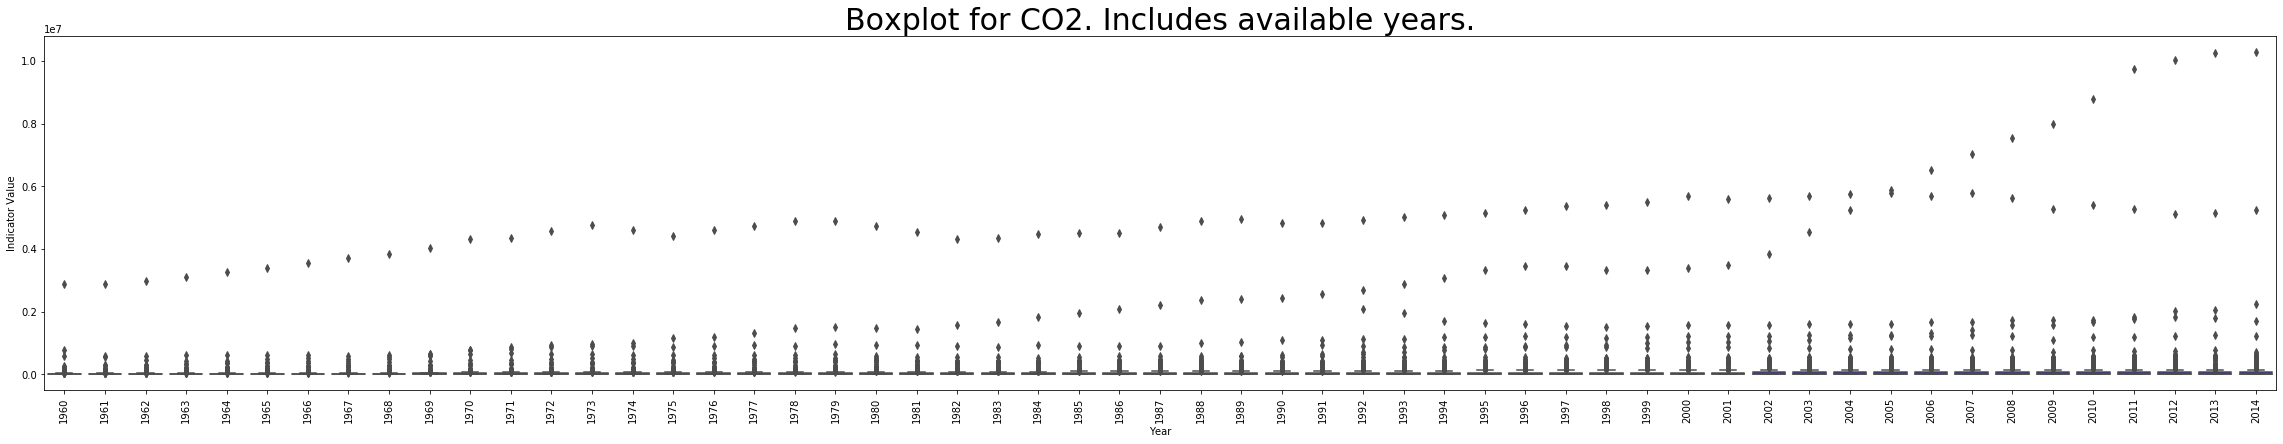

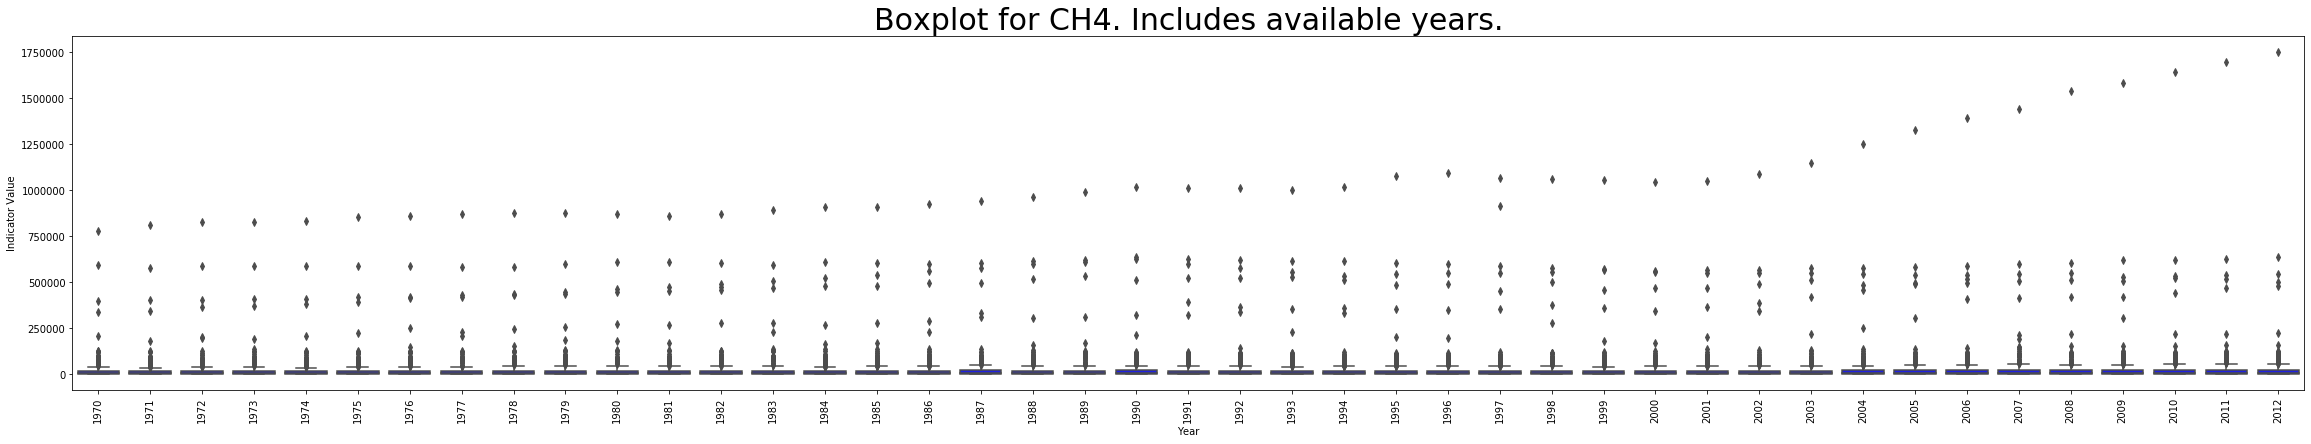

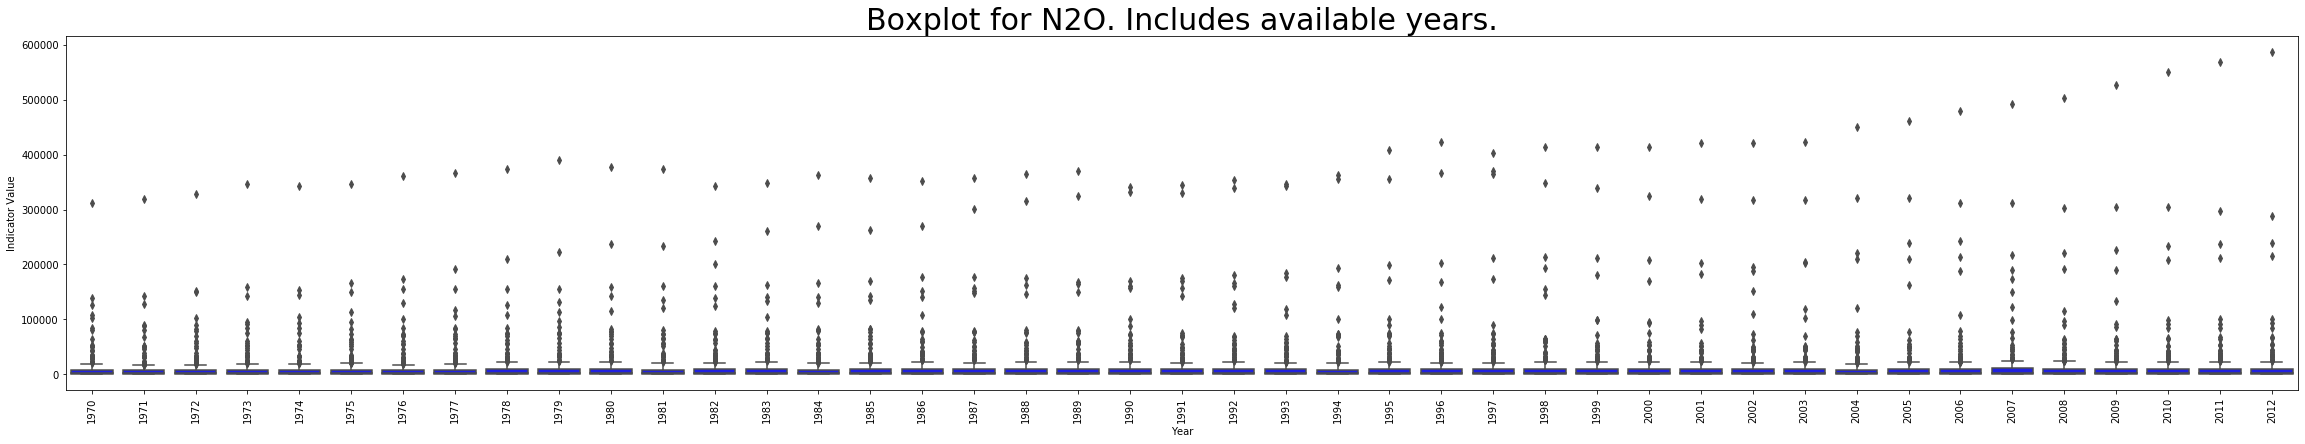

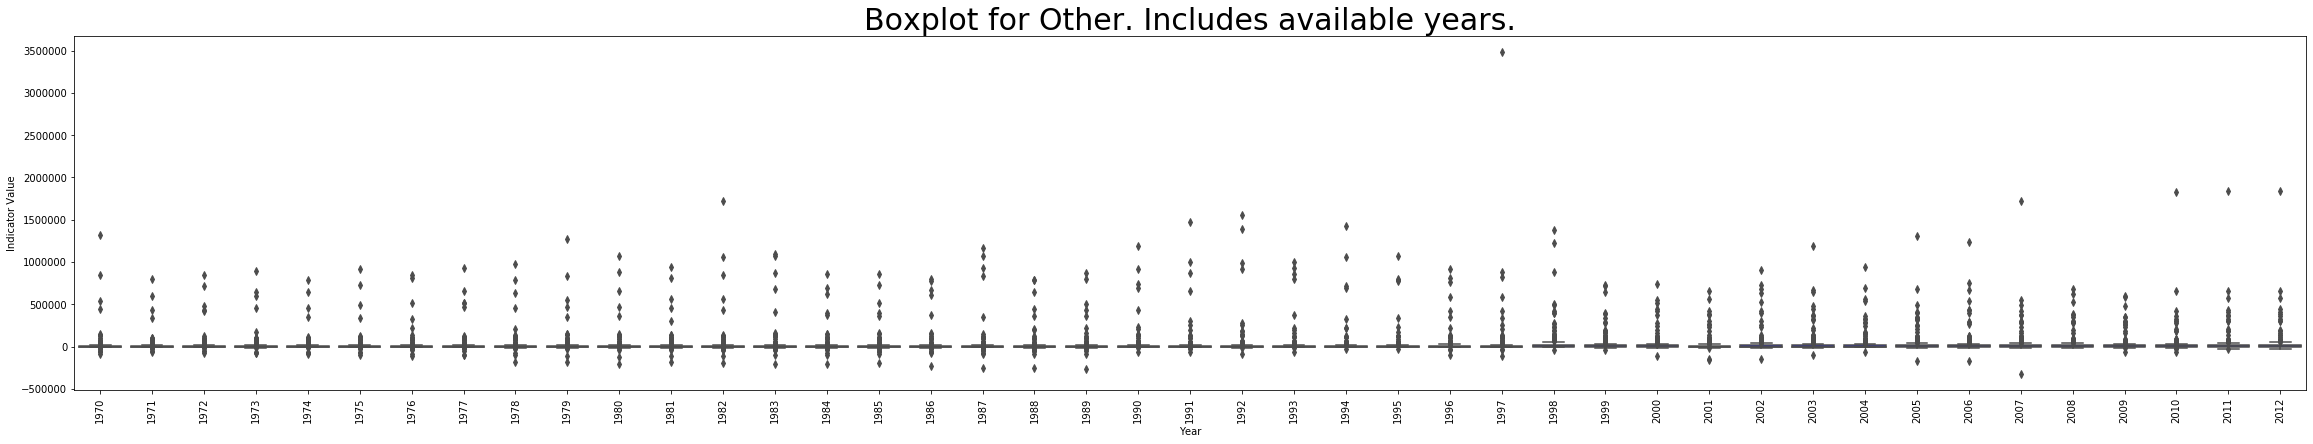

In [61]:
for i,elem in enumerate(main_ind):
    _=plt.figure(figsize=(40,30))
    plt.subplot(4,1,i+1)
    data=Emissions_C_df_edit[Emissions_C_df_edit['Indicator Name']==elem]
    sns.boxplot(x='Year',y='Indicator Value',data=data,color='blue')
    title_str='Boxplot for '+elem+'. Includes available years.'
    plt.title(title_str)
    plt.xticks(rotation=90)
    plt.title(label=title_str,size=30)

_All the indicators are increasing, have very long tails, and the Units of measure do not help to figure the relative positions easily_

#### 7.3 (15 min)
Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the ```Emissions_R_df``` data frame. The main regions are ```'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific'``` and ```'North America'```. What conclusions can you make?

**Answer.**

In [62]:
list_region=['Latin America & Caribbean','South Asia','Sub-Saharan Africa','Europe & Central Asia',
             'Middle East & North Africa','East Asia & Pacific','North America']

In [63]:
Emissions_R_df_edit=Emissions_R_df[(Emissions_R_df['Country Name'].isin(list_region))& 
                                   (Emissions_R_df['Indicator Name'].isin(main_ind))]


In [64]:
Emissions_R_df_edit.rename(columns={"Country Name":"Region"},inplace=True)

In [65]:
Emissions_R_df_edit.Region.unique()

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

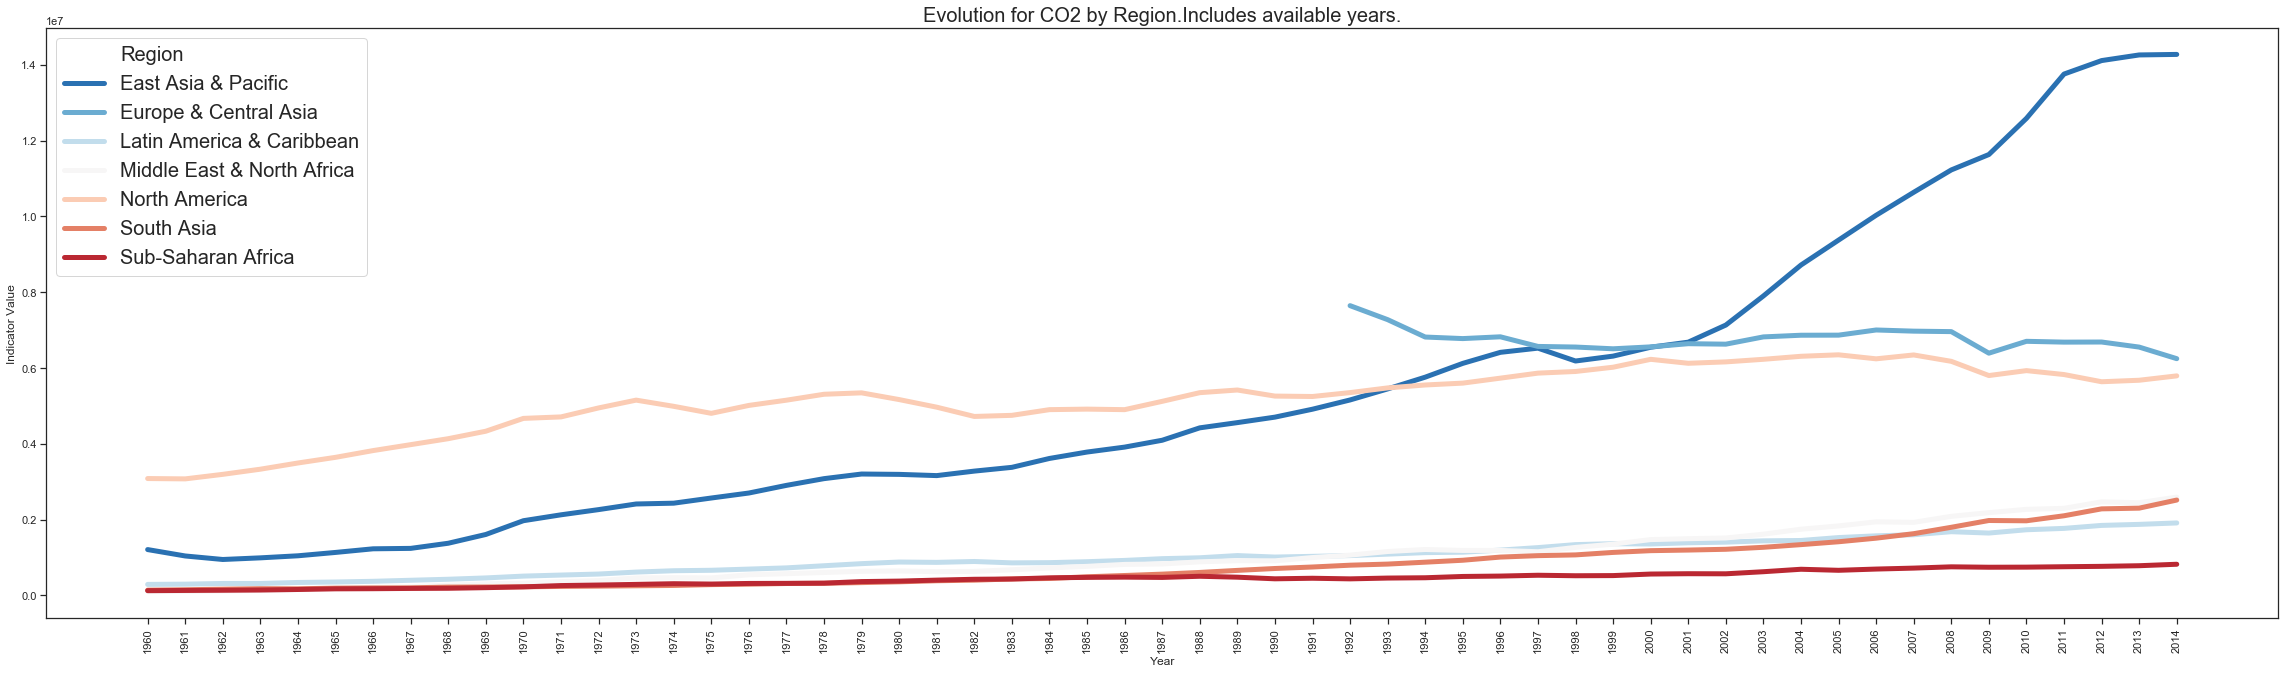

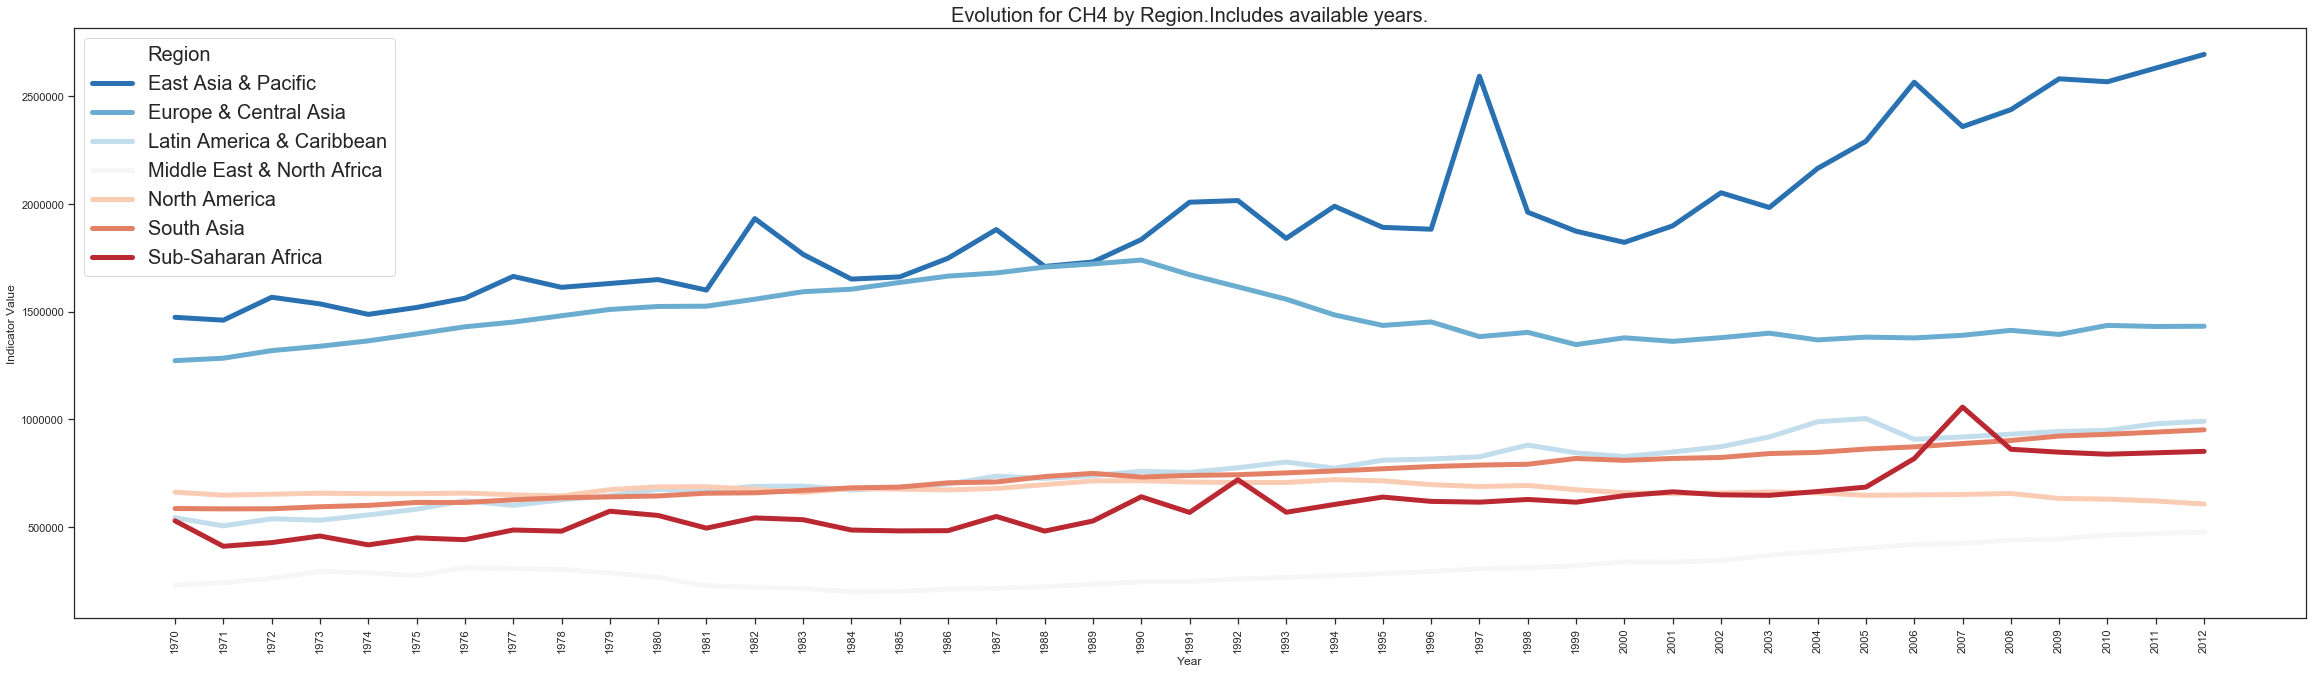

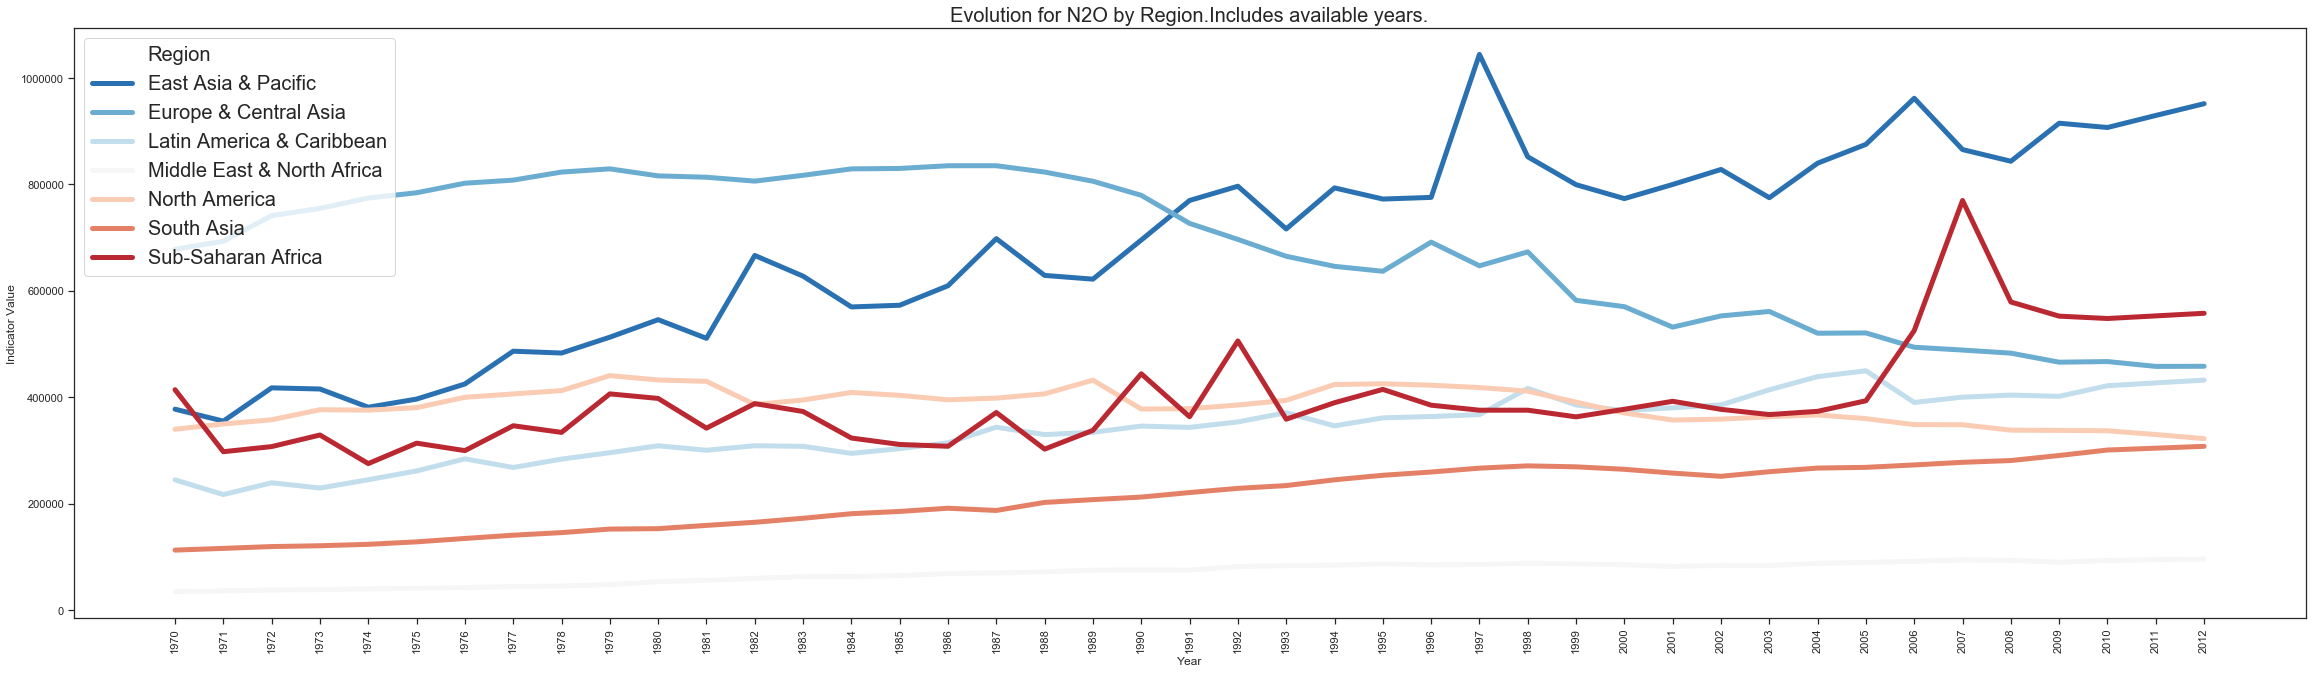

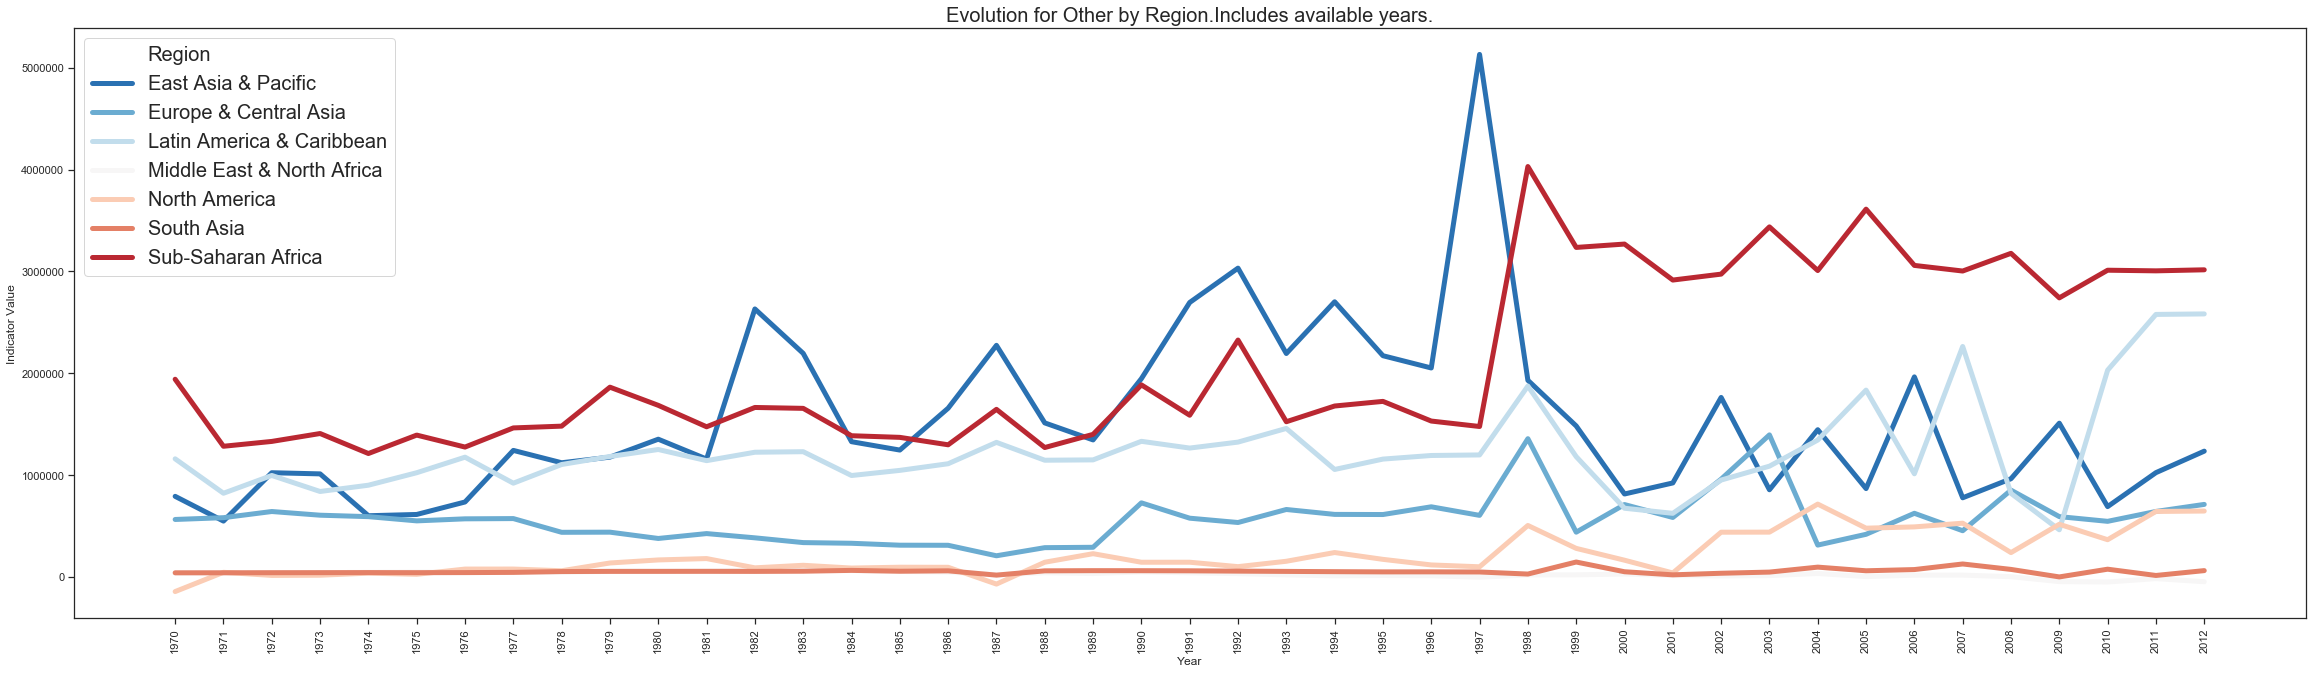

In [66]:
sns.set_style("darkgrid")
palette=sns.color_palette("RdBu_r", 7)

sns.set(style="ticks", rc={"lines.linewidth": 5})

for i,elem in enumerate(main_ind):
    _=plt.figure(figsize=(40,50))
    plt.subplot(4,1,i+1)
    data=Emissions_R_df_edit[Emissions_R_df_edit['Indicator Name']==elem]
    sns.lineplot(x='Year',y='Indicator Value',data=data,hue='Region',palette=palette)
    title_str='Evolution for '+elem+' by Region.Includes available years.'
    plt.xticks(rotation=90)
    plt.legend(prop={'size':20})
    plt.title(label=title_str,size=20)

_A few thoughts on this:_

_-I would be very worried about N2O, CO2 and CH4 levels in East Asia & Pacific: Steadily growing. This is important since this countries are still going through high levels of economic growth._

_-North America seems to be doing and effort to mitigate their CO2 levels._

_-I would be worried about "Other" Growth in Subsaharian Africa._

### Exercise 8:

In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features with more detail. 

#### 8.1 (20 min)
Which are the top five countries that have been in the top 10 of ```CO2``` emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?

In [67]:
top10year=Emissions_C_df_edit[Emissions_C_df_edit['Indicator Name']=='CO2'].groupby('Year')\
.apply(lambda x :x.nlargest(10,'Indicator Value')).reset_index(drop=True)

In [68]:
top10year.head(11)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,United States,USA,CO2,EN.ATM.CO2E.KT,1960,2890696.100
1,China,CHN,CO2,EN.ATM.CO2E.KT,1960,780726.302
2,United Kingdom,GBR,CO2,EN.ATM.CO2E.KT,1960,584299.780
3,France,FRA,CO2,EN.ATM.CO2E.KT,1960,271218.654
4,Japan,JPN,CO2,EN.ATM.CO2E.KT,1960,232781.160
5,Poland,POL,CO2,EN.ATM.CO2E.KT,1960,199767.159
6,Canada,CAN,CO2,EN.ATM.CO2E.KT,1960,192895.201
7,India,IND,CO2,EN.ATM.CO2E.KT,1960,120581.961
8,Italy,ITA,CO2,EN.ATM.CO2E.KT,1960,109357.274
9,South Africa,ZAF,CO2,EN.ATM.CO2E.KT,1960,97934.569


In [69]:
top10year.tail(11)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
539,Canada,CAN,CO2,EN.ATM.CO2E.KT,2013,5.171607e+05
540,China,CHN,CO2,EN.ATM.CO2E.KT,2014,1.029193e+07
541,United States,USA,CO2,EN.ATM.CO2E.KT,2014,5.254279e+06
542,India,IND,CO2,EN.ATM.CO2E.KT,2014,2.238377e+06
543,Russian Federation,RUS,CO2,EN.ATM.CO2E.KT,2014,1.705346e+06
544,Japan,JPN,CO2,EN.ATM.CO2E.KT,2014,1.214048e+06
545,Germany,DEU,CO2,EN.ATM.CO2E.KT,2014,7.198834e+05
546,"Iran, Islamic Rep.",IRN,CO2,EN.ATM.CO2E.KT,2014,6.494807e+05
547,Saudi Arabia,SAU,CO2,EN.ATM.CO2E.KT,2014,6.010470e+05
548,"Korea, Rep.",KOR,CO2,EN.ATM.CO2E.KT,2014,5.871564e+05


In [70]:
top5CO2=list(top10year.groupby(['Country Name'])['Indicator Value'].count().\
    sort_values(ascending=False)[:5].index)

In [71]:
top5CO2

['United States', 'Japan', 'China', 'India', 'Canada']

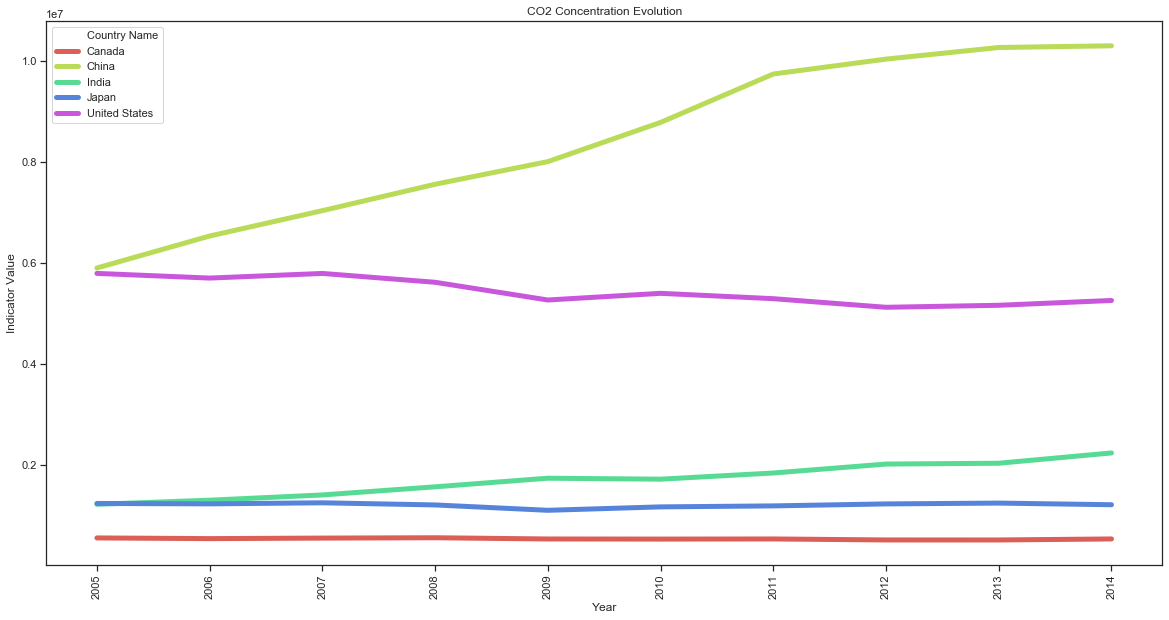

In [72]:
palette=sns.color_palette("hls", 5)

sns.set(style="ticks", rc={"lines.linewidth": 5})

#Filtering CO2 and countries in my top5 list
data=Emissions_C_df_edit[(Emissions_C_df_edit['Indicator Name']=='CO2') & 
                        (Emissions_C_df_edit['Country Name'].isin(top5CO2))]

years_CO2=list(data['Year'].astype(float).unique())
years_CO2=np.sort(years_CO2)[-10:]

_=plt.figure(figsize=(20,10))
_=plt.title('CO2 Concentration Evolution')
_=sns.lineplot(x='Year',y='Indicator Value',
                data=data[data['Year'].astype(float).isin(years_CO2)],
                hue='Country Name',palette=palette)
_=plt.xticks(rotation=90)

_China has steadily increased its CO2 emissions, India has shown a more modest growth, while Canada, Japan and USA has stabilized their levels_

**Answer.**

#### 8.2 (20 min)

Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is doing some effort to control the amount of emissions of polluted gases over the years?

**Answer.**

_From the Regions plot, I conclude that other countries are also increasing their pollution levels, but starting from much smaller levels. When managing developing nations, I would say that we should be careful to not compromise their growth, and emphasize work on countries whose contribution is greater._

## The health impacts of air pollution

### Exercise 9:

One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles of size less than 2.5 micrometres ($\mu$m) can enter and affect the respiratory system. The ```PM2.5``` indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The ```PM2.5_WHO``` measures the  percentage of the population who are exposed ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with higher ```PM2.5_WHO``` indicator are more exposed to suffer from badly health conditions. 


#### 9.1 (20 min)

The client would like to know if there is any relationship between the ```PM2.5_WHO``` indicator and the level of income of the general population. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?

**Hint:** The DataFrame ```WDI_countries``` contains a column named ```Income Group```. 

**Answer.**

In [73]:
WDI_countries_df=pd.read_csv("./files/WDI_csv/WDICountry.csv")

In [74]:
WDI_countries_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN


In [75]:
WDI_countries_df.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')

In [76]:
WDI_countries_df.groupby(['Country Code','National accounts reference year'])\
['Table Name'].count().head()

Country Code  National accounts reference year
ALB           2010                                1
ARM           2012                                1
AUS           2017                                1
AUT           2010                                1
AZE           2005                                1
Name: Table Name, dtype: int64

_It seems that only one year is used to classify a Country by Income_

In [77]:
WDI_countries_df=WDI_countries_df[['Country Code','Short Name','Income Group']]

_For this purpose, I'll drop NaN values,and filter just for PM2.5_WHO_

In [78]:
Emissions_C_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'Indicator Value'],
      dtype='object')

In [79]:
Emissions_C_PM_df=Emissions_C_df[Emissions_C_df['Indicator Name']=='PM2.5_WHO']

In [80]:
Emissions_C_PM_df['Indicator Name'].unique()

array(['PM2.5_WHO'], dtype=object)

In [81]:
Emissions_C_PM_df=Emissions_C_PM_df[Emissions_C_PM_df['Indicator Value'].notna()]
Emissions_C_PM_df['Year']=Emissions_C_PM_df['Year'].astype(int)

_I will use the last available PM indicator, since I do not have access to Income Group by Year:_  

In [82]:
Emissions_C_PM_LY_df=Emissions_C_PM_df.groupby('Country Code')\
.apply(lambda x :x.nlargest(1,'Year')).reset_index(drop=True)

In [83]:
WDI_countries_df.columns

Index(['Country Code', 'Short Name', 'Income Group'], dtype='object')

In [84]:
WDI_countries_df_small=WDI_countries_df[['Country Code','Income Group']]

In [85]:
WDI_countries_df_small.columns

Index(['Country Code', 'Income Group'], dtype='object')

In [86]:
Emissions_C_PM_LY_df=Emissions_C_PM_LY_df.merge(WDI_countries_df_small,how='inner',on='Country Code');

In [87]:
Emissions_C_PM_LY_df[['Income Group','Indicator Value']].groupby(['Income Group'])['Indicator Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Income Group,,,,,,,,
High income,59.0,67.559807,39.584343,0.000000,25.908330,89.174356,100.0,100.0
Low income,31.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.0,100.0
Lower middle income,47.0,99.706009,0.981178,95.567147,100.000000,100.000000,100.0,100.0
Upper middle income,57.0,95.545994,15.568284,0.000000,99.812592,100.000000,100.0,100.0


_Seems that the lower the income, the higher the proportion afflicted by unhealthy PM2.5 levels._

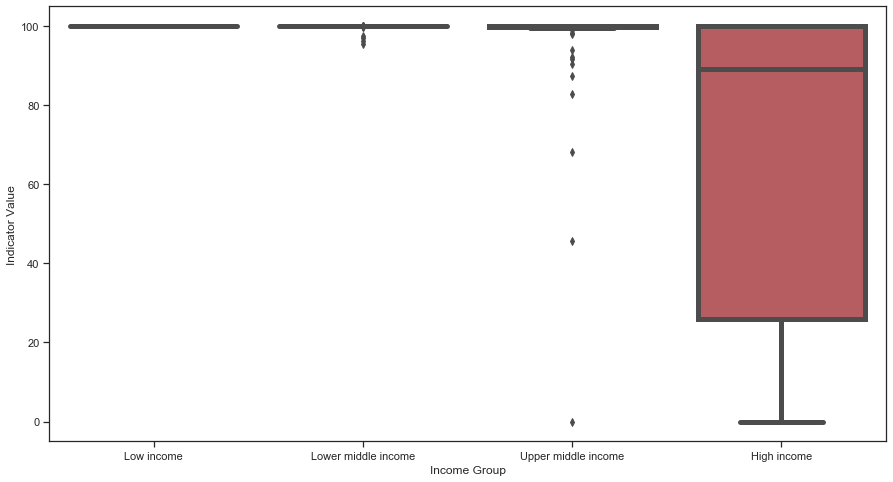

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Income Group", y="Indicator Value", data=Emissions_C_PM_LY_df)

_I would show him that when income grows, also does the variability in the indicator. This is specially worrisome, because the dispersion for poor countries is low, and we conclude that low income populations face large percentage of their population under high PM2.5 concentrations._

#### 9.2 (5 min)

What do you think are the causes behind the results in Exercise 9.1?

**Answer.**

_I would say that richer countries have the chance to mitigate and fight PM2.5 emissions via public policy, and this could be most difficult when political consensus or money is missing. We'll check the worst 10 countries:_

In [89]:
Emissions_C_PM_LY_df.loc[Emissions_C_PM_LY_df['Income Group']=='High income',\
            ['Country Name','Indicator Value']].sort_values(by='Indicator Value',\
            ascending=False)[:10]

,Country Name,Indicator Value
116,Malta,100.0
146,Qatar,100.0
79,Hungary,100.0
162,Slovak Republic,100.0
4,United Arab Emirates,100.0
86,Israel,100.0
44,Cyprus,100.0
96,"Korea, Rep.",100.0
97,Kuwait,100.0
175,Trinidad and Tobago,100.0


_And the ten countries that are doing better:_

In [90]:
Emissions_C_PM_LY_df.loc[Emissions_C_PM_LY_df['Income Group']=='High income',\
            ['Country Name','Indicator Value']].sort_values(by='Indicator Value')[:10]

,Country Name,Indicator Value
133,New Zealand,0.000000
58,Finland,0.000000
56,Estonia,0.000000
27,Brunei Darussalam,0.000000
31,Canada,0.000000
82,Ireland,0.274092
131,Norway,2.043838
182,United States,3.343170
164,Sweden,3.636487
141,Puerto Rico,3.669725


_We can see that we have rich (Brunei, Canada), politically stable (Estonia, Finland) and/or good weather conditions (Puerto Rico)._


### Exercise 10:

Finally, our client is interested in investigating the impacts and relationships between high levels of exposure of particle matter and the health of the population. Coming up with additional data for this task may be infeasible for the client, thus they have ask us to search for relevant health data in the ```WDIdata.csv``` file and work with that. 

#### 10.1 (10 min)

Which indicators present in the file  ```WDISeries.csv``` file might be useful to solve the client's question? Explain.

**Note:** Naming one or two indicators is more than enough for this question. 

**Answer:**

In [91]:
WDI_ids.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20', 'Subtopic'],
      dtype='object')

In [92]:
health_topics =np.sort(WDI_ids.loc[WDI_ids['Topic'].str.\
                                   startswith('Health'),'Subtopic'].unique())

In [93]:
health_topics

array(['Disease prevention', 'Health systems', 'Mortality', 'Nutrition',
       'Population', 'Reproductive health', 'Risk factors',
       'Universal Health Coverage'], dtype=object)

In [94]:
health_indicators=list(WDI_ids.loc[WDI_ids['Subtopic']=="Mortality",'Series Code'])

In [95]:
WDI_data.loc[WDI_data['Indicator Code'].isin(health_indicators),['Indicator Code',
                                                                'Indicator Name']]

,Indicator Code,Indicator Name
701,SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)"
702,SP.DYN.LE00.MA.IN,"Life expectancy at birth, male (years)"
703,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"
784,SH.STA.TRAF.P5,Mortality caused by road traffic injury (per 1...
785,SH.DYN.NCOM.ZS,"Mortality from CVD, cancer, diabetes or CRD be..."
786,SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD be..."
787,SH.DYN.NCOM.MA.ZS,"Mortality from CVD, cancer, diabetes or CRD be..."
788,SH.STA.AIRP.P5,Mortality rate attributed to household and amb...
789,SH.STA.AIRP.FE.P5,Mortality rate attributed to household and amb...
790,SH.STA.AIRP.MA.P5,Mortality rate attributed to household and amb...


_Given the choice, I would use "SP.DYN.LE00.IN, Life expectancy at birth, total (years)"_

#### 10.2 (30 min)

Use the indicators provided in Exercise 10.1 to give valuable information to the client. 

**Answer**

In [96]:
qstn10cods=['SP.DYN.LE00.IN','EN.ATM.PM25.MC.M3']

In [97]:
health_df=WDI_data[WDI_data['Indicator Code'].isin(qstn10cods)]

In [98]:
columns=list(health_df.columns)
print(list(columns))

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64']


In [99]:
id_vars=['Country Name','Country Code','Indicator Name','Indicator Code']
value_vars=[x for x in columns if x not in id_vars]

In [100]:
health_df=pd.melt(health_df,
                         value_vars=value_vars,
                         id_vars=id_vars,
                         value_name='Indicator Value',
                         var_name='Year')

In [101]:
health_df['Indicator Name'].unique()

array(['Life expectancy at birth, total (years)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'],
      dtype=object)

In [102]:
health_df.Year.unique()

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', 'Unnamed: 64'], dtype=object)

In [103]:
health_df.groupby(['Indicator Name'])['Year'].max()

Indicator Name
Life expectancy at birth, total (years)                                   Unnamed: 64
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    Unnamed: 64
Name: Year, dtype: object

In [104]:
condition2=health_df['Year']=='Unnamed: 64'

In [105]:
health_df.drop(health_df[condition2].index,axis=0,inplace=True)

In [106]:
health_df.Year.unique()

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'], dtype=object)

In [107]:
health_df['Year']=health_df['Year'].astype(int)

In [108]:
health_df[health_df['Indicator Value'].notna()].groupby(['Indicator Name'])['Year'].max()

Indicator Name
Life expectancy at birth, total (years)                                   2017
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    2017
Name: Year, dtype: int64

In [109]:
health_df[health_df['Indicator Value'].notna()].groupby(['Indicator Name'])['Year'].min()

Indicator Name
Life expectancy at birth, total (years)                                   1960
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    1990
Name: Year, dtype: int64

In [110]:
health_df_2017=health_df[health_df['Year']==2017]

In [111]:
health_df_2017=health_df_2017[['Country Name','Indicator Code','Indicator Value']]

In [112]:
health_df_2017.columns

Index(['Country Name', 'Indicator Code', 'Indicator Value'], dtype='object')

In [113]:
health_df_2017=health_df_2017.pivot(index='Country Name', columns='Indicator Code', 
                         values='Indicator Value')

In [114]:
health_df_2017.reset_index(inplace=True)

In [115]:
health_df_2017.sample(3)

Indicator Code,Country Name,EN.ATM.PM25.MC.M3,SP.DYN.LE00.IN
110,Indonesia,16.502653,71.282000
54,Cyprus,17.294406,80.672000
22,Bermuda,11.646359,81.441951


In [116]:
health_df_2017.rename(columns={'EN.ATM.PM25.MC.M3':'PM2.5 Mean Annual Exposure',
                               'SP.DYN.LE00.IN':'Life Expectancy in Years'},inplace=True)

In [117]:
health_df_2017.columns

Index(['Country Name', 'PM2.5 Mean Annual Exposure',
       'Life Expectancy in Years'],
      dtype='object', name='Indicator Code')

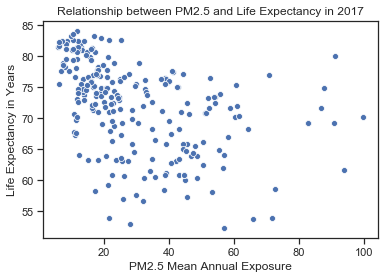

In [118]:
_=sns.scatterplot(data=health_df_2017,x='PM2.5 Mean Annual Exposure'
             ,y='Life Expectancy in Years')
_=plt.title('Relationship between PM2.5 and Life Expectancy in 2017')

_And we can say that for an important number of countries, as of 2017, we could find what seems a negative relationship between PM and Life Expectancy. Is it possible that PM2.5 lowers life expectancy by causing deaths in boths infants and otherwise healthy older adults?_  

In [119]:
health_df_2017.corr().values[0,1].round(2)

-0.45

_We have not explored yet if there are a confounding factors, which could be important in PM2.5 medium range emisssions:_

   _-Maybe poor / developing countries have medium range economic activity / pollution but also not very enowed healthcare systems._
   
   _-At the end of the PM2.5 mean emission range, we have a high variability._

_¿What are the countries with the highest PM 2.5 Exposure?_

In [120]:
topPMcountries=list(health_df_2017.nlargest(n=5,columns='PM2.5 Mean Annual Exposure')
           ['Country Name'])
print(topPMcountries)

['Nepal', 'Niger', 'Qatar', 'India', 'Saudi Arabia']


And what are the countries with the lowest PM 2.5 Exposure?

In [121]:
bottomPMcountries=list(health_df_2017.nsmallest(n=5,columns='PM2.5 Mean Annual Exposure')
           ['Country Name'])
print(bottomPMcountries)

['Finland', 'Brunei Darussalam', 'New Zealand', 'Sweden', 'Canada']
